In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17428, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 17428 (delta 73), reused 28 (delta 28), pack-reused 17327 (from 2)
Receiving objects: 100% (17428/17428), 16.29 MiB | 18.00 MiB/s, done.
Resolving deltas: 100% (11943/11943), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s

 **ROBOFLOWDAN ALINAN VERİ İLE**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d9rgyowU5KPlOKliPoM2")
project = rf.workspace("ivonne").project("drones-oddbp")
version = project.version(3)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drones-3 in yolov5pytorch:: 100%|██████████| 7422/7422 [00:00<00:00, 8216.50it/s]


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/yolov5/Drones-3/data.yaml --weights yolov5s.pt --name uav_roboflow_model


Görüntülenen çıkış son 5000 satıra kısaltıldı.
      37/49      4.51G     0.0207   0.008482          0         38        640:  87% 176/203 [01:03<00:08,  3.00it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      37/49      4.51G    0.02069   0.008484          0         42        640:  87% 177/203 [01:03<00:08,  3.21it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      37/49      4.51G    0.02067   0.008476          0         31        640:  88% 178/203 [01:03<00:08,  2.83it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      37/49      4.51G    0.02069  

In [ ]:
!python detect.py --weights runs/train/uav_roboflow_model/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/Drones-3/test/images


detect: weights=['runs/train/uav_roboflow_model/weights/best.pt'], source=/content/yolov5/Drones-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-417-g2ef88637 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/157 /content/yolov5/Drones-3/test/images/0001_jpg.rf.bc61071c401b831743f4528d75ff5510.jpg: 640x640 6 drones, 11.4ms
image 2/157 /content/yolov5/Drones-3/test/images/0025_jpg.rf.3a0bb68714f2ce17d34c36b1b6c13dcc.jpg: 640x640 1 drone, 11.5ms
image 3/157 /content/yolov5/Drones-

In [ ]:
import pandas as pd

df = pd.read_csv('/content/yolov5/runs/train/uav_roboflow_model/results.csv')
print(df.columns)


FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/train/uav_roboflow_model/results.csv'

In [ ]:
df.columns = df.columns.str.strip()


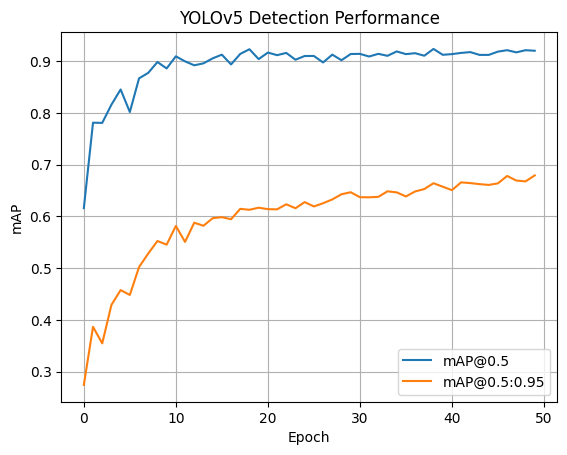

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku ve sütun adlarını temizle
df = pd.read_csv('/content/yolov5/runs/train/uav_roboflow_model/results.csv')
df.columns = df.columns.str.strip()

# mAP grafiklerini çiz
plt.plot(df['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('YOLOv5 Detection Performance')
plt.legend()
plt.grid(True)
plt.show()


**modeli kaydetmek**

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/uav_roboflow_model/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**BURDAN AŞŞAĞIDAKİ HÜCRELERDE DAHA ÖNCEDEN EĞİTİP KAYDEDİLEN MODEL İLE TEST VERİLERİNİ SINIFLANDIRIOYRUZ VE SINIFLANDIRDIĞIMIZ VERİLERE GÖRE DOĞRLULUK DEĞERİNE BAKIYORUZ**

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 17485 (delta 85), reused 40 (delta 33), pack-reused 17358 (from 2)
Receiving objects: 100% (17485/17485), 16.31 MiB | 1.34 MiB/s, done.
Resolving deltas: 100% (11985/11985), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive

 best-drones-oddbp.pt
 best.pt
 Classroom
'Colab Notebooks'
'Emirhan Göker - 432568 (ÖDEV - 2) (1).rar'
'Emirhan Göker - 432568 (ÖDEV - 2) (2).rar'
'Emirhan Göker - 432568 (ÖDEV - 2).rar'
 test
'test.rar adlı dosyanın kopyası'


In [ ]:
!ls /content/drive/MyDrive/test


images	labels	labels.cache


In [ ]:
!mkdir -p /content/yolov5/dummy/train
!mkdir -p /content/yolov5/dummy/val


In [ ]:
data_yaml = """
train: dummy/train
val: dummy/val
test: /content/drive/MyDrive/test/images

nc: 1
names: ['object']
"""

with open("/content/yolov5/data.yaml", "w") as f:
    f.write(data_yaml)


FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/data.yaml'

In [ ]:
%cd /content/yolov5

!python val.py \
  --weights /content/drive/MyDrive/best-drones-oddbp.pt \
  --data /content/yolov5/data.yaml \
  --task test \
  --img 640


[Errno 2] No such file or directory: '/content/yolov5'
/content
python3: can't open file '/content/val.py': [Errno 2] No such file or directory


**TEST VERİLERİNİN best-drones-oddbp.pt İLE SONUCLARI**

In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Modeli yükle
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/best-drones-oddbp.pt')

# Test verilerinin yolu
test_images_path = Path("/content/drive/MyDrive/test/images")

# Görselleri işle
for image_path in test_images_path.glob("*.jpg"):
    # Görüntüyü modelle tahmin et
    results = model(image_path)

    # Tahmin sonuçlarını çiz
    results.show()

    # Ekstra: Görselleri kaydetmek isterseniz
    save_path = f"/content/test_results/{image_path.name}"
    results.save(save_path)

    results.save(f"/content/drive/MyDrive/test_results/{image_path.name}")



/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-5-12 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 


In [ ]:
import cv2
import torch
import numpy as np
from pathlib import Path

# Yol tanımları
image_dir = Path("/content/drive/MyDrive/test/images")
label_dir = Path("/content/drive/MyDrive/test/labels")
output_dir = Path("/content/drive/MyDrive/compare_results")
output_dir.mkdir(parents=True, exist_ok=True)

# Modeli yükle
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/best-drones-oddbp.pt')

# Görselleri işle
for image_path in image_dir.glob("*.jpg"):
    img = cv2.imread(str(image_path))
    h, w = img.shape[:2]

    # Gerçek etiketleri oku ve çiz (yeşil)
    label_path = label_dir / (image_path.stem + ".txt")
    if label_path.exists():
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x, y, bw, bh = map(float, line.strip().split())
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # yeşil kutu

    # Model tahminleri (kırmızı)
    results = model(image_path)
    for *xyxy, conf, cls in results.xyxy[0]:  # (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, xyxy)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # kırmızı kutu

    # Sonuçları kaydet
    cv2.imwrite(str(output_dir / image_path.name), img)


**pc kamerası ile yapma**

In [ ]:
import cv2
import torch

# Modeli yükle
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/best-drones-oddbp.pt')  # pt dosyanın tam yolu

# Webcam başlat
cap = cv2.VideoCapture(0)  # 0: varsayılan kamera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # BGR'den RGB'ye çevir (YOLO bunu bekler)
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Tahmin yap
    results = model(img)

    # Sonuçları çizdir (OpenCV formatı)
    results.render()
    output_frame = results.ims[0]

    # Ekrana göster - Bu kısmı değiştiriyoruz
    # cv2.imshow('YOLOv5 Drone Detection', output_frame)
    # Bunun yerine, görüntüyü kaydedip daha sonra görüntüleyebilirsiniz:
    from IPython.display import Image, display
    display(Image(data=cv2.imencode('.jpg', output_frame)[1].tobytes()))

    # 'q' tuşuna basınca çık
    # cv2.waitKey(1) & 0xFF == ord('q')  # Bu satıra gerek yok
    break # Döngüyü kır - Bir kere tahmin yapıp çıksın.

# Temizle
cap.release()
# cv2.destroyAllWindows()  # Bu satıra da gerek yok

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-12 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
